## Package Installation

In [1]:
import numpy as np  # NumPy numerical computing
import pandas as pd  # Pandas Data Analysis
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns

## Import Data

The different data points come from Bloomberg and Refinititv Workspace. Refer to the documentation on how to download the data from the two platforms. Pulling data for different instruments and different time ponts from Refinitiv Workspace requires the user to work with Excel. After creating the Excel file, the fallowing steps are used to create an SQL database and the data frame to work with in this Notebook.

In [2]:
cwd=os.getcwd()
FileBonds=os.path.join(cwd,'2_Doktorat','Data','Daten Sustainable Bonds Bloomberg.xlsx')
FileBonds
# File in Laufwerk C: --> Wichtig, immer mal wieder Backup in U: machen

'C:\\Users\\roer\\2_Doktorat\\Data\\Daten Sustainable Bonds Bloomberg.xlsx'

In [3]:
print(FileBonds)

C:\Users\roer\2_Doktorat\Data\Daten Sustainable Bonds Bloomberg.xlsx


In [61]:
df_AllBonds=pd.read_excel(FileBonds,sheet_name='All')
# Replace column names spaces with underscores for easier referencing
df_AllBonds.columns = df_AllBonds.columns.str.replace(' ', '_').str.replace('.', '')
# Ensure the Emissionsdatum is a datetime column
df_AllBonds['Emissionsdatum'] = pd.to_datetime(df_AllBonds['Emissionsdatum'])
df_AllBonds['Year'] = df_AllBonds['Emissionsdatum'].dt.year
df_AllBonds['YearMonth'] = df_AllBonds['Emissionsdatum'].dt.to_period('M')
df_AllBonds.columns

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['Emittent', 'Identifier', 'ParentID', 'Ticker', 'Sust_Linked',
       'Social_Bond', 'Green_Instrument', 'Sitzland', 'Ausg_Mge', 'Maturity',
       'Emissionsdatum', 'BICS_Level_1', 'Kpn', 'Fälligkeit', 'Serie',
       'BBG_Composite', 'FällTyp', 'Währungen', 'Emissionsdatum_-1_Jahr',
       'TotalAssets', 'MarketCap', 'TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA',
       'ROE', 'TRBC_ES', 'Year', 'YearMonth'],
      dtype='object')

With this dataframe it is possible to do the analysis on how the market for sustainable bonds devolped over time, how the the different measurement channged and how the companies isssuing these instruments differ from another. Next we clean the data, to only include rows with complete data. If the analysis should be done including all rows, we use the df_AllBonds

In [49]:
# clean data
# Replace "Unable to resolve all requested identifiers." with NaN
df_temp = df_AllBonds.replace("Unable to resolve all requested identifiers.", np.nan)

# Create a new DataFrame by dropping the rows where at least one element is missing.
df_filtered = df_temp.dropna()
df_filtered

,Emittent,Identifier,ParentID,Ticker,Sust_Linked,Social_Bond,Green_Instrument,Sitzland,Ausg_Mge,Maturity,...,Emissionsdatum_-1_Jahr,TotalAssets,MarketCap,TobinsQ,LTLeverage,CFtoAsset,ROA,ROE,TRBC_ES,Year
16,Westpac Securities NZ Ltd/London,XS2016070430,4295856627,WSTPNZ,0.00,0.00,1.00,GB,568150000.00,5.01,...,2018-06-25,851875000000,99962164647.60,0.12,248.56,0.00,0.97,13.57,Financials,2019.00
17,Brambles Finance PLC,XS2596458591,4295856631,BXBAU,0.00,0.00,1.00,GB,539750000.00,8.01,...,2022-03-22,7496100000,13902089820.48,1.85,85.15,0.21,7.25,20.42,Basic Materials,2023.00
21,CA Immobilien Anlagen AG,XS2248827771,4295858951,CAIAV,0.00,0.00,1.00,AT,413885500.00,5.00,...,2019-10-28,5355504000,3413827870.60,0.64,65.30,0.04,6.14,12.53,Real Estate,2020.00
32,Oberbank AG,AT0000A2RZH2,4295859095,OBERBK,0.00,0.00,1.00,AT,296087500.00,10.01,...,2020-07-02,22829029000,2707351740.00,0.12,69.22,-0.02,0.41,3.30,Financials,2021.00
43,Raiffeisen Bank International AG,AT000B014782,4295859134,RBIAV,0.00,0.00,1.00,AT,52163760.00,5.01,...,2018-10-29,135146339000,7749817470.76,0.06,83.93,-0.05,1.00,12.50,Financials,2019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.00,0.00,1.00,FR,10100000.00,12.01,...,2018-07-08,1551572000000,32833823900.70,0.02,199.98,0.02,0.27,5.50,Financials,2019.00
4066,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.00,0.00,1.00,FR,50000000.00,7.01,...,2020-03-23,1767643000000,18888941686.18,0.01,201.93,0.00,0.32,7.06,Financials,2021.00
4068,Credit Agricole Corporate & Investment Bank SA,5000038216,CAGR.PA,ACAFP,0.00,0.00,1.00,FR,2000000.00,5.50,...,2017-10-30,1524232000000,43303480363.09,0.03,212.92,-0.01,0.22,4.47,Financials,2018.00
4074,Credit Agricole Corporate & Investment Bank SA,Retrieving...,CAGR.PA,ACAFP,0.00,0.00,1.00,FR,10000000.00,10.01,...,2018-09-18,1551572000000,35841930198.62,0.02,199.98,0.02,0.28,5.82,Financials,2019.00


## Descreptive Analysis

### Bond Measures

First, we want to look at the most important measures of the bonds, namly maturity, coupon and emission volume.

In [62]:
cols_to_convert = ['Ausg_Mge', 'Kpn','Maturity']

# Convert columns to numeric
for col in cols_to_convert:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


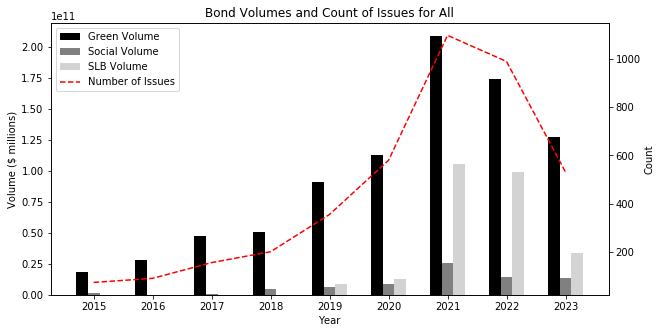

In [73]:
# Function to plot volumes and counts by country
def plot_bond_volumes_and_count_by_country(df, countries=None):
    if countries:
        df = df[df['Sitzland'].isin(countries)]
    
    # Calculate volumes for green, social, and sustainable bonds and count of issues per year
    df['Green_Volume'] = df['Green_Instrument'] * df['Ausg_Mge']
    df['Social_Volume'] = df['Social_Bond'] * df['Ausg_Mge']
    df['Sust_Volume'] = df['Sust_Linked'] * df['Ausg_Mge']
    
    yearly_data = df.groupby('Year').agg({
        'Green_Volume': 'sum',
        'Social_Volume': 'sum',
        'Sust_Volume': 'sum',
        'Ticker': 'count'
    }).reset_index()
    
    # Create the bar plot
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.bar(yearly_data['Year'] - 0.2, yearly_data['Green_Volume'], width=0.2, label='Green Volume', color='black')
    ax1.bar(yearly_data['Year'], yearly_data['Social_Volume'], width=0.2, label='Social Volume', color='grey')
    ax1.bar(yearly_data['Year'] + 0.2, yearly_data['Sust_Volume'], width=0.2, label='SLB Volume', color='lightgray')
    
    ax1.set_xticks(yearly_data['Year'])
    
    # Create the line plot for count of issues
    ax2 = ax1.twinx()
    ax2.plot(yearly_data['Year'], yearly_data['Ticker'], label='Number of Issues', color='red', linestyle='--')
    
    # Labels & Title
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Volume ($ millions)')
    ax2.set_ylabel('Count')
    title_countries = 'All' if not countries else ', '.join(countries)
    plt.title(f'Bond Volumes and Count of Issues for {title_countries}')
    
    # Legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)

    plt.show()

# Call the function with your desired country codes
plot_bond_volumes_and_count_by_country(df_AllBonds)


In [75]:
# Change format for displayed numbers:
pd.options.display.float_format = '{:.2f}'.format

# Selecting specific columns for descriptive statistics
selected_columns = df_filtered[['Ausg_Mge', 'Kpn','Maturity']]

# Generating descriptive statistics and rounding
descriptive_stats = np.round(selected_columns.describe(), 2).T[['mean', 'std']]


descriptive_stats = descriptive_stats.applymap(lambda x: '{:,.2f}'.format(x))
# Display the statistics
latex_green = descriptive_stats.to_latex()

print(descriptive_stats)

                    mean             std
Ausg_Mge  611,799,689.69  382,939,088.51
Kpn                 2.66            2.09
Maturity            8.40            8.09


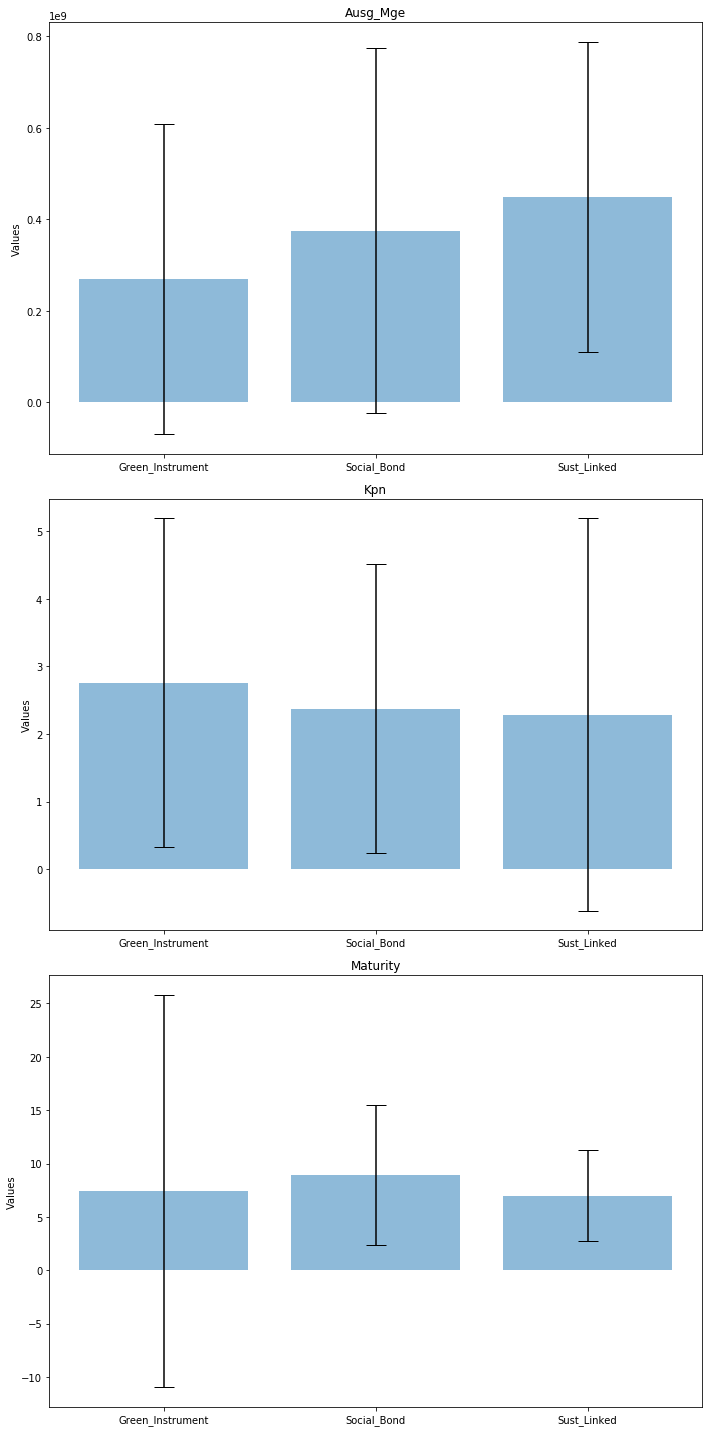

In [76]:
# List of columns to analyze
meas_to_analyze = ['Ausg_Mge','Kpn','Maturity']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(meas_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(meas_to_analyze):
    # Initialize a list to store means and standard deviations for each instrument
    means = []
    stds = []
    
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_filtered_instrument = df_AllBonds[df_AllBonds[instrument] == 1]
        
        # Calculate mean and standard deviation
        mean = df_filtered_instrument[col].mean()
        std = df_filtered_instrument[col].std()
        
        # Append to the lists
        means.append(mean)
        stds.append(std)
    
    # Create a bar plot for the mean with standard deviation as error bars
    axs[i].bar(instruments, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'{col}')

# Show the plot
plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


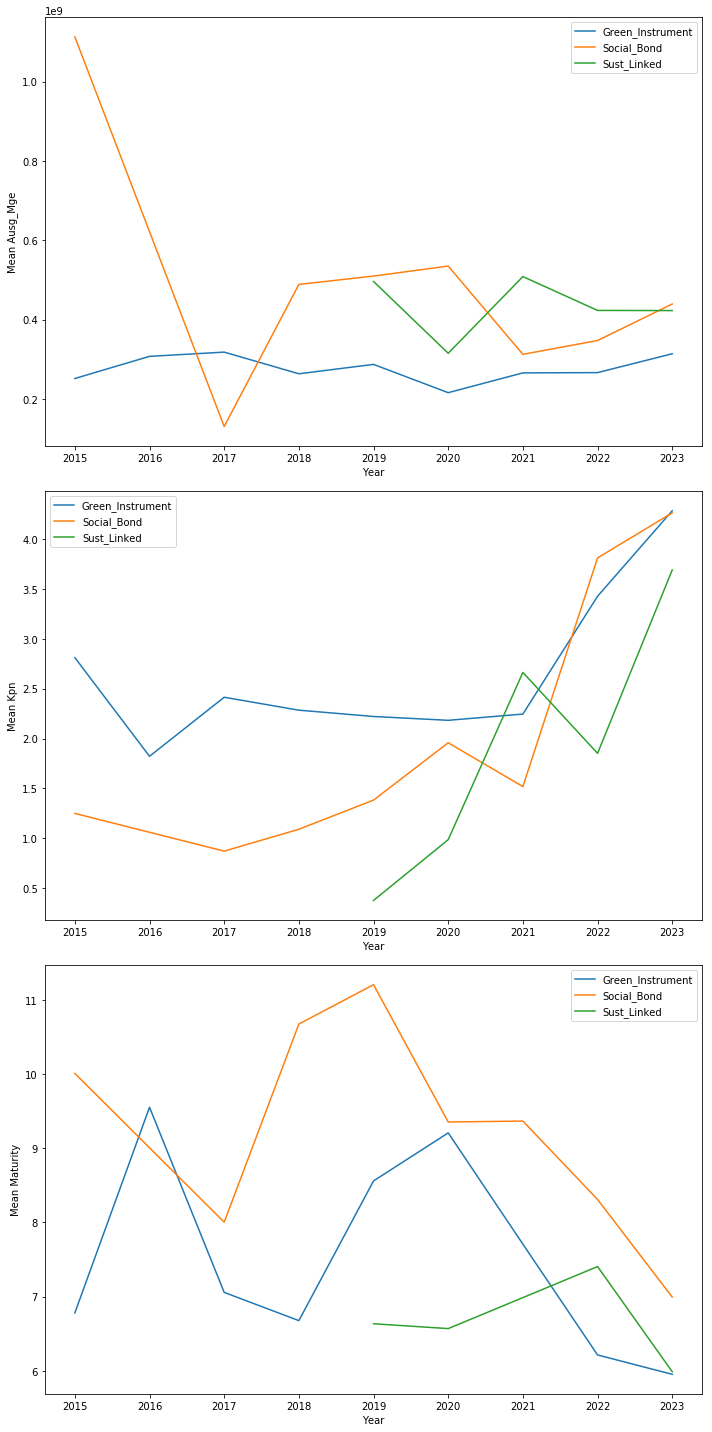

In [77]:
# List of columns to analyze
meas_to_analyze = ['Ausg_Mge','Kpn','Maturity']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(meas_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(meas_to_analyze):
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_AllBonds[df_AllBonds[instrument] == 1]
        
        # Group by year and calculate mean
        means = df_instrument.groupby('Year')[col].mean()
        
        # Create a line plot for the mean
        axs[i].plot(means.index, means.values, label=instrument)
    
    axs[i].set_ylabel('Mean ' + col)
    axs[i].set_xlabel('Year')
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()


In [78]:
# Calculate the distribution of elements in the 'FällTyp' column
distribution = df_AllBonds['FällTyp'].value_counts()

# Calculate the percentage distribution
percentage_distribution = (distribution / len(df_AllBonds)) * 100

# Print the result
print(percentage_distribution)

AT MATURITY     63.93
CALLABLE        32.07
SINKABLE         1.84
PERP/CALL        1.01
CONVERTIBLE      0.37
CALL/SINK        0.27
EXTENDIBLE       0.20
CALL/PUT         0.10
PERP/CALL/PUT    0.07
PUTABLE          0.05
PASS-THRU        0.02
CALL/EXT         0.02
CONV/PUT         0.02
Name: FällTyp, dtype: float64


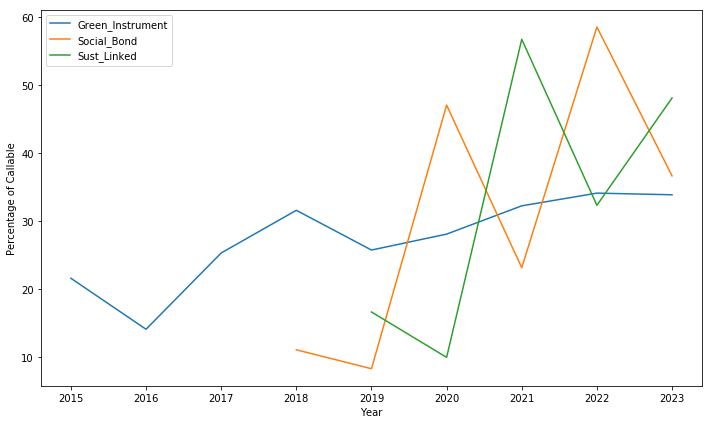

In [79]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each instrument
for instrument in instruments:
    # Filter the DataFrame for the current instrument
    df_instrument = df_AllBonds[df_AllBonds[instrument] == 1]
    
    # Filter for 'Callable' FällTyp
    df_callable = df_instrument[df_instrument['FällTyp'] == 'CALLABLE']
    
    # Group by year and calculate the percentage
    percentage_callable = (df_callable.groupby('Year').size() / df_instrument.groupby('Year').size()) * 100
    
    # Create a line plot for the percentage
    ax.plot(percentage_callable.index, percentage_callable.values, label=instrument)

ax.set_ylabel('Percentage of Callable')
ax.set_xlabel('Year')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Company Data

In [80]:
num_unique_ParentID = df_filtered['ParentID'].nunique()
print("Number of unique elements in 'ParentID':", num_unique_ParentID)

num_unique_ParentID = df_filtered['ParentID'].nunique()
print("Number of unique elements in 'ParentID':", num_unique_ParentID)

# Number of unique 'ParentID' where 'Sust_Linked' is equal to 1
num_unique_sust_linked = df_filtered[df_filtered['Sust_Linked'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Sust_Linked' is 1:", num_unique_sust_linked)

# Number of unique 'ParentID' where 'Social_Bond' is equal to 1
num_unique_social_bond = df_filtered[df_filtered['Social_Bond'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Social_Bond' is 1:", num_unique_social_bond)

# Number of unique 'ParentID' where 'Green_Instrument' is equal to 1
num_unique_green_instrument = df_filtered[df_filtered['Green_Instrument'] == 1]['ParentID'].nunique()
print("Number of unique 'ParentID' where 'Green_Instrument' is 1:", num_unique_green_instrument)

Number of unique elements in 'ParentID': 207
Number of unique elements in 'ParentID': 207
Number of unique 'ParentID' where 'Sust_Linked' is 1: 56
Number of unique 'ParentID' where 'Social_Bond' is 1: 16
Number of unique 'ParentID' where 'Green_Instrument' is 1: 160


In [81]:
cols_to_convert = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# Convert columns to numeric
for col in cols_to_convert:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [82]:
# Get counts of unique values in 'TRBC_ES'
trbc_es_counts = df_filtered['TRBC_ES'].value_counts()

# Print the counts
print("Counts of unique values in 'TRBC_ES':\n", trbc_es_counts)

Counts of unique values in 'TRBC_ES':
 Financials                351
Utilities                 176
Industrials               109
Real Estate               101
Basic Materials            44
Consumer Cyclicals         44
Technology                 25
Consumer Non-Cyclicals     23
Energy                     16
Healthcare                 10
Name: TRBC_ES, dtype: int64


In [89]:
# Define the TRBC_ES value you're interested in
trbc_es_value = input("Choosen Industry: ")

# Filter the DataFrame for the specified TRBC_ES value
df_filtered_trbc_es = df_filtered[df_filtered['TRBC_ES'] == trbc_es_value]

# Group by 'Green_Instrument' and calculate descriptive statistics
green_stats = df_filtered_trbc_es[df_filtered_trbc_es['Green_Instrument'] == 1][['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']].describe()

# Group by 'Social_Bond' and calculate descriptive statistics
social_stats = df_filtered_trbc_es[df_filtered_trbc_es['Social_Bond'] == 1][['TobinsQ', 'LTLeverage', 'CFtoAsset','ROA', 'ROE']].describe()

# Group by 'Sust_Linked' and calculate descriptive statistics
sust_stats = df_filtered_trbc_es[df_filtered_trbc_es['Sust_Linked'] == 1][['TobinsQ', 'LTLeverage','CFtoAsset', 'ROA', 'ROE']].describe()

# Print the statistics
print("Green Instrument Statistics:\n", green_stats)
print("\nSocial Bond Statistics:\n", social_stats)
print("\nSust Linked Statistics:\n", sust_stats)

Choosen Industry: Utilities
Green Instrument Statistics:
        TobinsQ  LTLeverage  CFtoAsset    ROA    ROE
count   132.00      132.00     132.00 132.00 132.00
mean      0.38      105.98       0.05   2.55  11.85
std       0.16       56.01       0.03   2.18  14.24
min       0.12       17.76      -0.06  -3.14 -15.52
25%       0.24       65.26       0.04   1.42   5.77
50%       0.37      101.30       0.05   2.65   8.94
75%       0.47      124.32       0.07   3.27  14.16
max       0.99      324.94       0.11  10.98  65.38

Social Bond Statistics:
        TobinsQ  LTLeverage  CFtoAsset  ROA  ROE
count     0.00        0.00       0.00 0.00 0.00
mean       NaN         NaN        NaN  NaN  NaN
std        NaN         NaN        NaN  NaN  NaN
min        NaN         NaN        NaN  NaN  NaN
25%        NaN         NaN        NaN  NaN  NaN
50%        NaN         NaN        NaN  NaN  NaN
75%        NaN         NaN        NaN  NaN  NaN
max        NaN         NaN        NaN  NaN  NaN

Sust Linked Sta

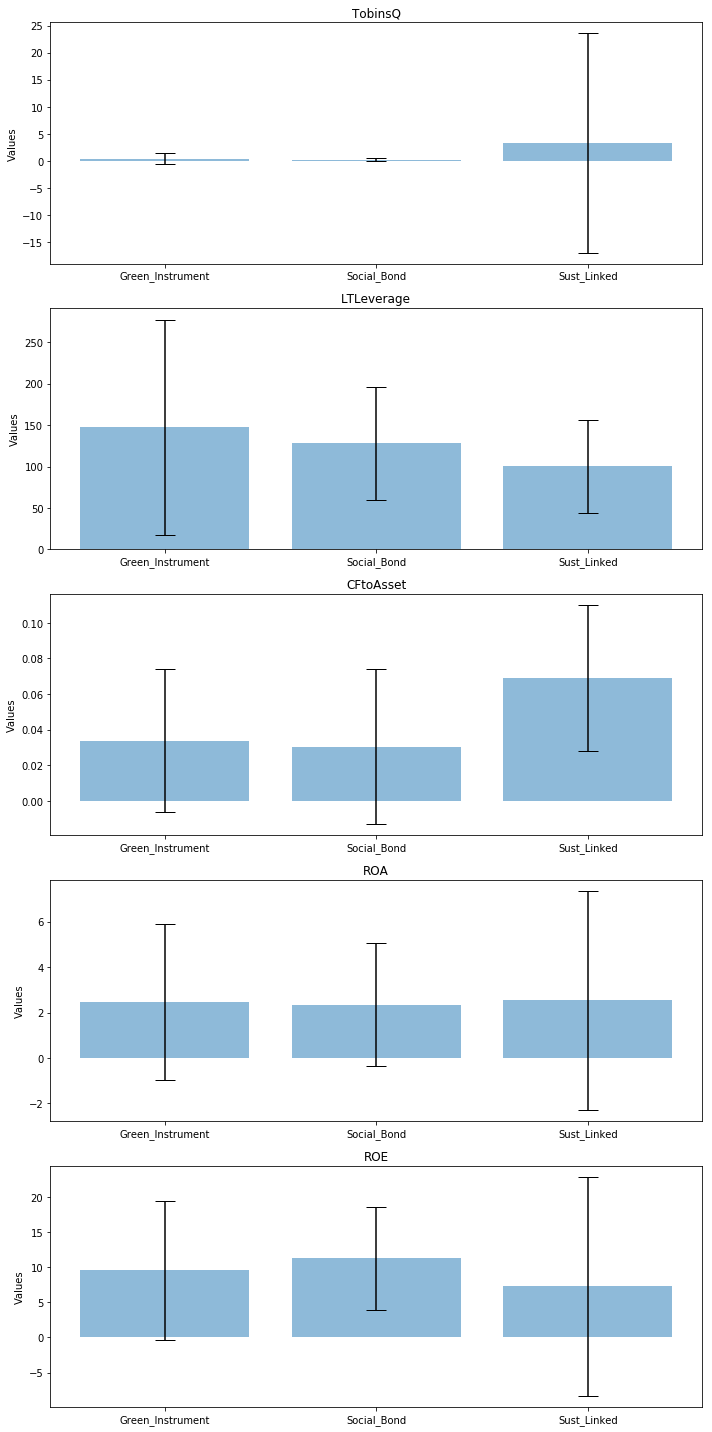

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
cols_to_analyze = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Initialize a list to store means and standard deviations for each instrument
    means = []
    stds = []
    
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Calculate mean and standard deviation
        mean = df_instrument[col].mean()
        std = df_instrument[col].std()
        
        # Append to the lists
        means.append(mean)
        stds.append(std)
    
    # Create a bar plot for the mean with standard deviation as error bars
    axs[i].bar(instruments, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'{col}')

# Show the plot
plt.tight_layout()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


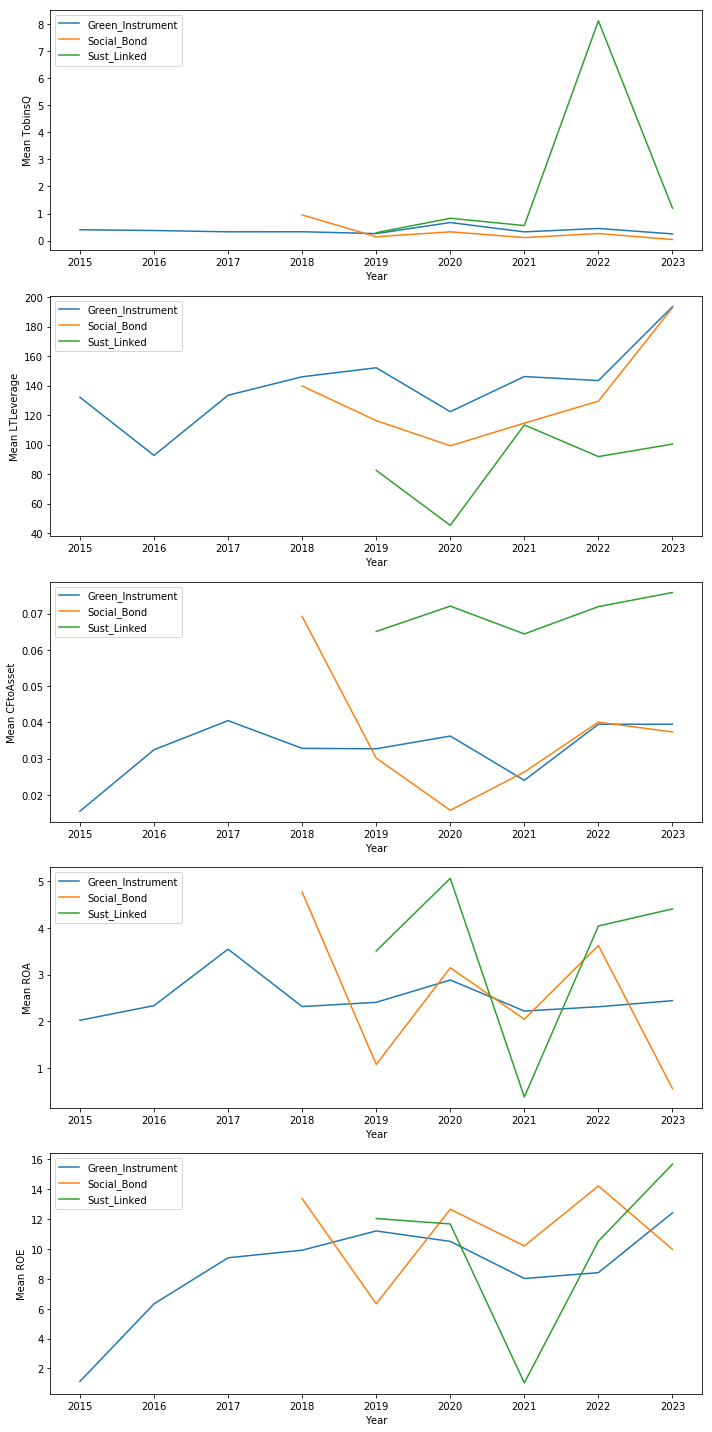

In [87]:
import matplotlib.pyplot as plt

# List of columns to analyze
cols_to_analyze = ['TobinsQ', 'LTLeverage', 'CFtoAsset', 'ROA', 'ROE']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Group by year and calculate mean
        means = df_instrument.groupby('Year')[col].mean()
        
        # Create a line plot for the mean
        axs[i].plot(means.index, means.values, label=instrument)
    
    axs[i].set_ylabel('Mean ' + col)
    axs[i].set_xlabel('Year')
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()

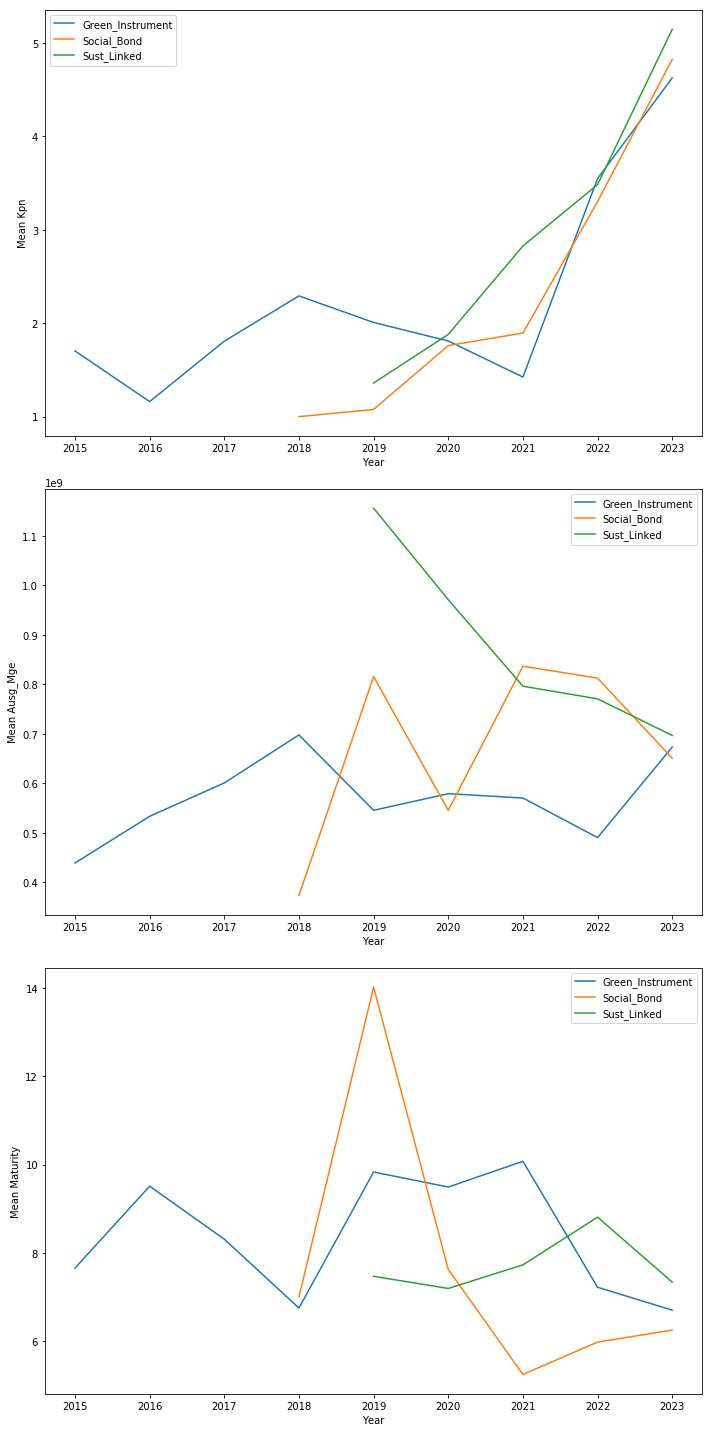

In [88]:
import matplotlib.pyplot as plt

# List of columns to analyze
cols_to_analyze = ['Kpn', 'Ausg_Mge', 'Maturity']

# List of instruments
instruments = ['Green_Instrument', 'Social_Bond', 'Sust_Linked']

# Create a figure and axes
fig, axs = plt.subplots(len(cols_to_analyze), 1, figsize=(10, 20))

# Loop over each column to analyze
for i, col in enumerate(cols_to_analyze):
    # Loop over each instrument
    for instrument in instruments:
        # Filter the DataFrame for the current instrument
        df_instrument = df_filtered[df_filtered[instrument] == 1]
        
        # Group by year and calculate mean
        means = df_instrument.groupby('Year')[col].mean()
        
        # Create a line plot for the mean
        axs[i].plot(means.index, means.values, label=instrument)
    
    axs[i].set_ylabel('Mean ' + col)
    axs[i].set_xlabel('Year')
    axs[i].legend()

# Show the plot
plt.tight_layout()
plt.show()